In [2]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
import cv2 as cv
import re

In [3]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.3 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2


In [4]:
#!python -m pip install paddlepaddle-gpu==2.3.1.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
#!python -m pip install paddlepaddle-gpu==2.3.1 -i https://mirror.baidu.com/pypi/simple    
# the bellow version works well on kaggle notebook
!python -m pip install paddlepaddle-gpu==2.3.1.post101 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html   

Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.3/393.3 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.8 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 kB 22.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.9.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.52.0 which is incompatible.
tfx-bsl 1.9.

In [5]:
!git clone https://github.com/PaddlePaddle/PaddleSeg

fatal: destination path 'PaddleSeg' already exists and is not an empty directory.


In [6]:
!cd /kaggle/working/PaddleSeg && mkdir data

mkdir: cannot create directory ‘data’: File exists


In [9]:
!cp -r /kaggle/input/data4projinitiation/content/Data4ProjInitiation/* /kaggle/working/PaddleSeg/data

In [10]:
#after changes install with the following command

!cd /kaggle/working/PaddleSeg && pip install -v -e .

Using pip 22.3.1 from /opt/conda/lib/python3.7/site-packages/pip (python 3.7)
Obtaining file:///kaggle/working/PaddleSeg
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-g21q65_o/paddleseg.egg-info
  writing /tmp/pip-pip-egg-info-g21q65_o/paddleseg.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-g21q65_o/paddleseg.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-g21q65_o/paddleseg.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-g21q65_o/paddleseg.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-g21q65_o/paddleseg.egg-info/SOURCES.txt'
  adding license file 'LICENSE'
  writing manifest file '/tmp/pip-pip-egg-info-g21q65_o/paddleseg.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Attempting uninstall: paddleseg
    Found existing installation: paddleseg 2.7.0
    Uninstalling paddleseg-2.7.0:
      Removing file or directory /opt/

**UNET**

In [6]:
"""
testsImages = open("/kaggle/input/unetlists/list_test.txt","r")

imagesBasePath = "/kaggle/working/PaddleSeg/data/"
resultsBasePath = "/kaggle/working/resultsUnet/added_prediction/"
groundTruthBasePath = "/kaggle/working/PaddleSeg/data/"

Images = []
Results = []
GroundTruth = []
for l in testsImages.readlines():
    l = l.split(" ")
    Images.append(imagesBasePath+l[0])
    n = l[0].split("/")[1]
    Results.append(resultsBasePath+n)
    GroundTruth.append(groundTruthBasePath+re.sub(r"\n","",l[1]))
"""    

In [54]:
"""
Images[0], Results[0], GroundTruth[0]
"""

('/kaggle/working/PaddleSeg/data/images/case129_day0_slice_0064.png',
 '/kaggle/working/resultsUnet/added_prediction/case129_day0_slice_0064.png',
 '/kaggle/working/PaddleSeg/data/labels/case129_day0_slice_0064.png\n')

In [7]:
"""
!mkdir resultsUnet
"""

mkdir: cannot create directory ‘resultsUnet’: File exists


In [8]:
"""
!rm /kaggle/working/PaddleSeg/data/list_test.txt
!rm /kaggle/working/PaddleSeg/data/list_training.txt
!rm /kaggle/working/PaddleSeg/data/list_val.txt

!cp /kaggle/input/unetlists/* /kaggle/working/PaddleSeg/data
"""

In [9]:
"""
# validation
!cd /kaggle/working/PaddleSeg && export CUDA_VISIBLE_DEVICES=0 && python tools/val.py \
       --config "/kaggle/input/configfiles/proj_Initiaition_configs_LATEST-VERSION_80000Iter_UNET_TRAINING.yml" \
       --model_path /kaggle/input/models/model_UNET.pdparams
"""       

2023-01-19 12:45:08 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------
W0119 12:45:08.634330   786 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:45:08.634371   786 gpu_resources.cc:91] device: 0, cuDNN Ver

In [10]:
"""
# test
!cd /kaggle/working/PaddleSeg && export CUDA_VISIBLE_DEVICES=0 && python tools/val.py \
       --config "/kaggle/input/configfiles/proj_Initiaition_configs_LATEST-VERSION_80000Iter_UNET_TEST.yml" \
       --model_path /kaggle/input/models/model_UNET.pdparams
"""

2023-01-19 12:46:24 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_test.txt
------------------------------------------------
W0119 12:46:24.519737   855 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:46:24.519767   855 gpu_resources.cc:91] device: 0, cuDNN Ve

In [11]:
"""
!rm -rf /kaggle/working/resultsUnet/*
"""

In [12]:
"""
import subprocess

indexs = []
for i in range(10):    
    ok = False
    
    while(not ok):
        ind = int(random()*len(Images))
        if(ind in indexs):
            ok = False
        else:
            ok = True
    indexs.append(ind)
    
    subprocess.run(["python", "/kaggle/working/PaddleSeg/tools/predict.py","--config","/kaggle/input/configfiles/proj_Initiaition_configs_LATEST-VERSION_80000Iter_UNET_TRAINING.yml","--model_path","/kaggle/input/models/model_UNET.pdparams","--image_path",Images[ind],"--save_dir","/kaggle/working/resultsUnet"])
"""    

2023-01-19 12:47:03 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:03.034292   905 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:03.034322   905 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:03 [INFO]	Number of predict images = 1
2023-01-19 12:47:03 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:04 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:04 [INFO]	Start to predict...


1/1 [==============================] - 1s 748ms/step


2023-01-19 12:47:07 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:07.346575   928 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:07.346606   928 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:08 [INFO]	Number of predict images = 1
2023-01-19 12:47:08 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:08 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:08 [INFO]	Start to predict...


1/1 [==============================] - 1s 797ms/step


2023-01-19 12:47:12 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:12.030709   957 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:12.031154   957 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:13 [INFO]	Number of predict images = 1
2023-01-19 12:47:13 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:13 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:13 [INFO]	Start to predict...


1/1 [==============================] - 1s 754ms/step


2023-01-19 12:47:16 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:16.577033   980 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:16.577065   980 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:17 [INFO]	Number of predict images = 1
2023-01-19 12:47:17 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:17 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:17 [INFO]	Start to predict...


1/1 [==============================] - 1s 746ms/step


2023-01-19 12:47:21 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:21.259419  1003 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:21.259446  1003 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:22 [INFO]	Number of predict images = 1
2023-01-19 12:47:22 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:22 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:22 [INFO]	Start to predict...


1/1 [==============================] - 1s 739ms/step


2023-01-19 12:47:25 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:25.587378  1033 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:25.587406  1033 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:26 [INFO]	Number of predict images = 1
2023-01-19 12:47:26 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:26 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:26 [INFO]	Start to predict...


1/1 [==============================] - 1s 733ms/step


2023-01-19 12:47:29 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:29.950533  1056 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:29.950562  1056 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:30 [INFO]	Number of predict images = 1
2023-01-19 12:47:30 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:30 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:30 [INFO]	Start to predict...


1/1 [==============================] - 1s 893ms/step


2023-01-19 12:47:34 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:34.427115  1085 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:34.427151  1085 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:35 [INFO]	Number of predict images = 1
2023-01-19 12:47:35 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:35 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:35 [INFO]	Start to predict...


1/1 [==============================] - 1s 740ms/step


2023-01-19 12:47:38 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:38.740620  1108 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:38.740654  1108 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:39 [INFO]	Number of predict images = 1
2023-01-19 12:47:39 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:39 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:39 [INFO]	Start to predict...


1/1 [==============================] - 1s 785ms/step


2023-01-19 12:47:43 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: UNet
  use_deconv: false
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:47:43.379559  1131 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:47:43.379587  1131 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:47:44 [INFO]	Number of predict images = 1
2023-01-19 12:47:44 [INFO]	Loading pretrained model from /kaggle/input/models/model_UNET.pdparams
2023-01-19 12:47:44 [INFO]	There are 112/112 variables loaded into UNet.
2023-01-19 12:47:44 [INFO]	Start to predict...


1/1 [==============================] - 1s 737ms/step


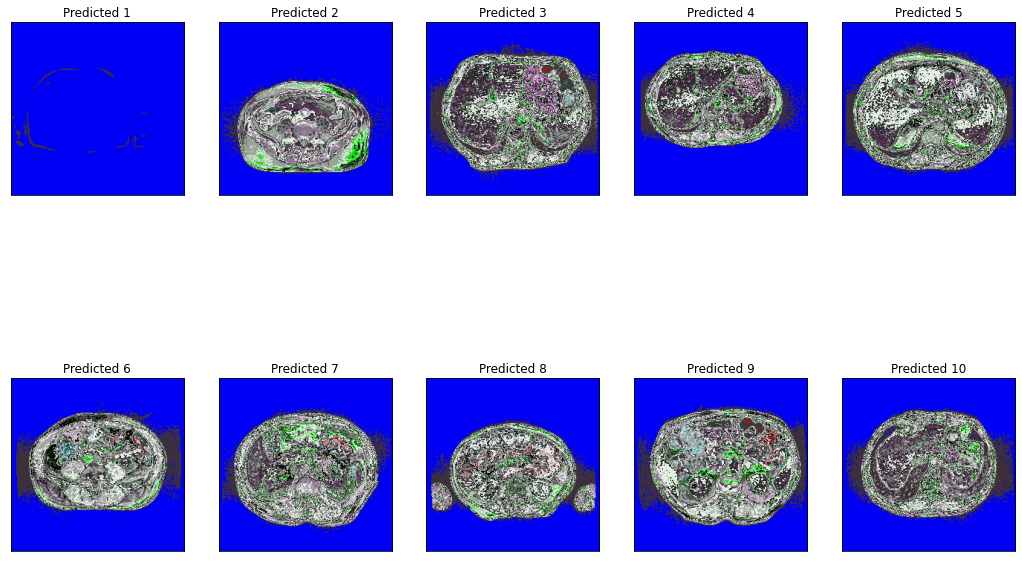

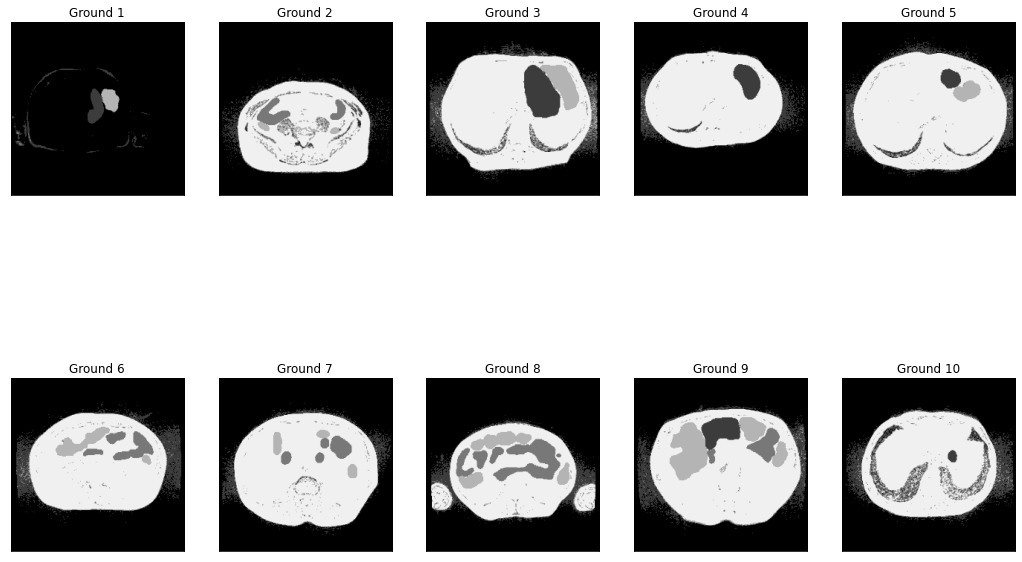

In [13]:
# show some samples (10) 
"""
plt.figure(figsize=(18,12))
for i in range(10):    
    
    
    plt.subplot(2,5,i+1)
    plt.imshow(cv.imread(Results[indexs[i]])*60,cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted "+ str(i+1))


plt.figure(figsize=(18,12))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(cv.imread(GroundTruth[indexs[i]])*60,cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title("Ground "+ str(i+1))
"""

**PPLiteSeg**

In [11]:
testsImages = open("/kaggle/input/unetlists/list_test.txt","r")

imagesBasePath = "/kaggle/working/PaddleSeg/data/"
resultsBasePath = "/kaggle/working/resultsPPliteSeg/added_prediction/"
groundTruthBasePath = "/kaggle/working/PaddleSeg/data/"

Images = []
Results = []
GroundTruth = []
for l in testsImages.readlines():
    l = l.split(" ")
    Images.append(imagesBasePath+l[0])
    n = l[0].split("/")[1]
    Results.append(resultsBasePath+n)
    GroundTruth.append(groundTruthBasePath+re.sub(r"\n","",l[1]))

In [12]:
!mkdir resultsPPliteSeg

mkdir: cannot create directory ‘resultsPPliteSeg’: File exists


In [15]:
!rm /kaggle/working/PaddleSeg/data/list_test.txt
!rm /kaggle/working/PaddleSeg/data/list_training.txt
!rm /kaggle/working/PaddleSeg/data/list_val.txt

!cp /kaggle/input/ppliteseglists/* /kaggle/working/PaddleSeg/data

In [17]:
# validation
!cd /kaggle/working/PaddleSeg && export CUDA_VISIBLE_DEVICES=0 && python tools/val.py \
       --config "/kaggle/input/configfiles/proj_Initiaition_configs_PPLiteSeg_LATEST-VERSION_80000Iter_PPLITESEG_TRAINING.yml" \
       --model_path /kaggle/input/models/model_PPLITESEG.pdparams

2023-01-19 12:47:55 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

In [18]:
# test
!cd /kaggle/working/PaddleSeg && export CUDA_VISIBLE_DEVICES=0 && python tools/val.py \
       --config "/kaggle/input/configfiles/proj_Initiaition_configs_PPLiteSeg_LATEST-VERSION_80000Iter_PPLITESEG_TEST.yml" \
       --model_path /kaggle/input/models/model_PPLITESEG.pdparams

2023-01-19 12:50:54 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_test.txt
--------------

In [19]:

!rm -rf /kaggle/working/resultsPPliteSeg/*

In [20]:
import subprocess
indexs = []
for i in range(10):    
    ok = False
    
    while(not ok):
        ind = int(random()*len(Images))
        if(ind in indexs):
            ok = False
        else:
            ok = True
    indexs.append(ind)
    
    subprocess.run(["python","/kaggle/working/PaddleSeg/tools/predict.py","--config","/kaggle/input/configfiles/proj_Initiaition_configs_PPLiteSeg_LATEST-VERSION_80000Iter_PPLITESEG_TRAINING.yml","--model_path","/kaggle/input/models/model_PPLITESEG.pdparams","--image_path",Images[ind],"--save_dir","/kaggle/working/resultsPPliteSeg"])

2023-01-19 12:52:17 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:52:17.456548  1365 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:52:17.456588  1365 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:52:18 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:52:18 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:52:18 [INFO]	Number of predict images = 1
2023-01-19 12:52:18 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:52:18 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:52:18 [INFO]	Start to predict...


1/1 [==============================] - 1s 774ms/step


2023-01-19 12:52:22 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:52:22.275960  1394 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:52:22.275991  1394 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:52:23 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:52:23 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:52:23 [INFO]	Number of predict images = 1
2023-01-19 12:52:23 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:52:23 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:52:23 [INFO]	Start to predict...


1/1 [==============================] - 1s 763ms/step


2023-01-19 12:52:26 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:52:26.964836  1417 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:52:26.964869  1417 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:52:27 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:52:28 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:52:28 [INFO]	Number of predict images = 1
2023-01-19 12:52:28 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:52:28 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:52:28 [INFO]	Start to predict...


1/1 [==============================] - 1s 832ms/step


2023-01-19 12:52:32 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:52:32.265744  1445 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:52:32.265775  1445 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:52:33 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:52:33 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:52:33 [INFO]	Number of predict images = 1
2023-01-19 12:52:33 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:52:33 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:52:33 [INFO]	Start to predict...


1/1 [==============================] - 1s 758ms/step


2023-01-19 12:52:36 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:52:36.976733  1468 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:52:36.976763  1468 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:52:37 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:52:38 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:52:38 [INFO]	Number of predict images = 1
2023-01-19 12:52:38 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:52:38 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:52:38 [INFO]	Start to predict...


1/1 [==============================] - 1s 755ms/step


2023-01-19 12:52:41 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:52:41.860332  1498 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:52:41.860378  1498 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:52:42 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:52:42 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:52:42 [INFO]	Number of predict images = 1
2023-01-19 12:52:42 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:52:43 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:52:43 [INFO]	Start to predict...


1/1 [==============================] - 1s 758ms/step


2023-01-19 12:52:46 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:52:46.547838  1521 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:52:46.547868  1521 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:52:47 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:52:47 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:52:47 [INFO]	Number of predict images = 1
2023-01-19 12:52:47 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:52:47 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:52:47 [INFO]	Start to predict...


1/1 [==============================] - 1s 755ms/step


2023-01-19 12:52:51 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:52:51.564190  1544 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:52:51.564221  1544 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:52:52 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:52:52 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:52:52 [INFO]	Number of predict images = 1
2023-01-19 12:52:52 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:52:52 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:52:52 [INFO]	Start to predict...


1/1 [==============================] - 1s 755ms/step


2023-01-19 12:52:56 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:52:56.271590  1573 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:52:56.271623  1573 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:52:57 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:52:57 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:52:57 [INFO]	Number of predict images = 1
2023-01-19 12:52:57 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:52:57 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:52:57 [INFO]	Start to predict...


1/1 [==============================] - 1s 751ms/step


2023-01-19 12:53:00 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - coef:
    - 0.8
    - 0.2
    losses:
    - min_kept: 65000
      type: OhemCrossEntropyLoss
    - type: LovaszSoftmaxLoss
    type: MixedLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
  warmup_iters: 500
  warmup_start_lr: 1.0e-05
model:
  backbone:
    in_channels: 3
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
    type: STDC2
  num_classes: 5
  type: PPLiteSeg
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 0.0005
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
---------------

W0119 12:53:00.984606  1596 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:53:00.984638  1596 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:53:02 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet2.tar.gz
2023-01-19 12:53:02 [INFO]	There are 265/265 variables loaded into STDCNet.
2023-01-19 12:53:02 [INFO]	Number of predict images = 1
2023-01-19 12:53:02 [INFO]	Loading pretrained model from /kaggle/input/models/model_PPLITESEG.pdparams
2023-01-19 12:53:02 [INFO]	There are 370/370 variables loaded into PPLiteSeg.
2023-01-19 12:53:02 [INFO]	Start to predict...


1/1 [==============================] - 1s 1s/step


/kaggle/working/resultsPPliteSeg/added_prediction/case9_day22_slice_0078.png
/kaggle/working/resultsPPliteSeg/added_prediction/case20_day22_slice_0071.png
/kaggle/working/resultsPPliteSeg/added_prediction/case143_day23_slice_0046.png
/kaggle/working/resultsPPliteSeg/added_prediction/case18_day21_slice_0103.png
/kaggle/working/resultsPPliteSeg/added_prediction/case90_day22_slice_0117.png
/kaggle/working/resultsPPliteSeg/added_prediction/case138_day12_slice_0101.png
/kaggle/working/resultsPPliteSeg/added_prediction/case113_day12_slice_0103.png
/kaggle/working/resultsPPliteSeg/added_prediction/case113_day0_slice_0055.png
/kaggle/working/resultsPPliteSeg/added_prediction/case125_day15_slice_0083.png
/kaggle/working/resultsPPliteSeg/added_prediction/case11_day12_slice_0056.png


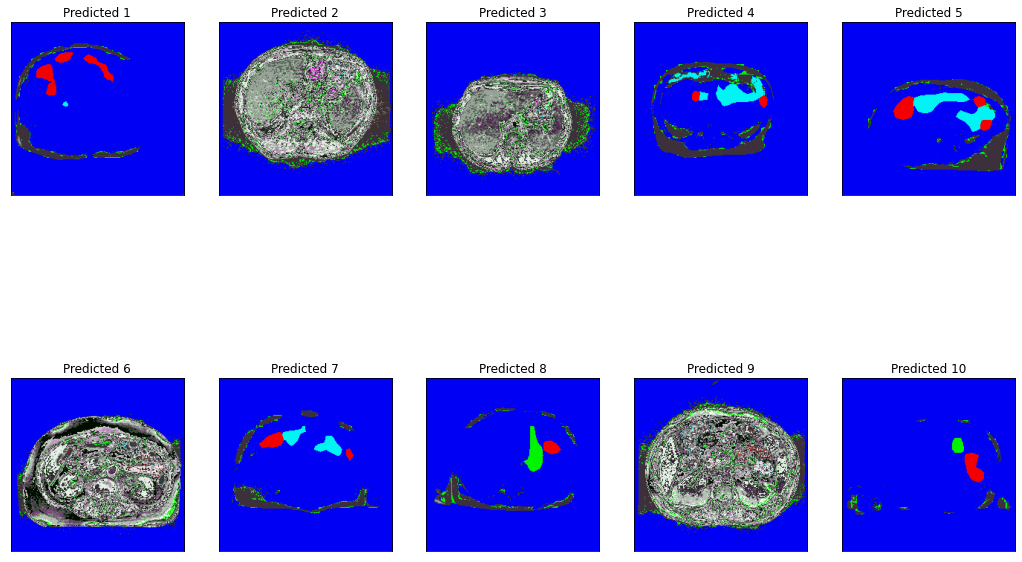

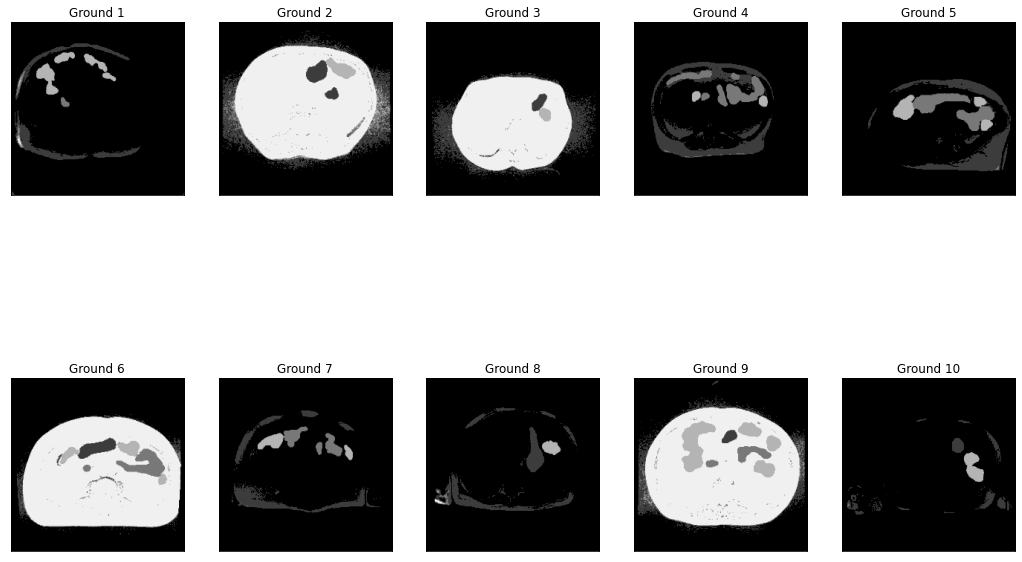

In [21]:
# show some samples (10) 

plt.figure(figsize=(18,12))
for i in range(10):            
    plt.subplot(2,5,i+1)    
    plt.imshow(cv.imread(Results[indexs[i]])*60,cmap="gray")    
    print(Results[indexs[i]])
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted "+ str(i+1))


plt.figure(figsize=(18,12))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(cv.imread(GroundTruth[indexs[i]])*60,cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title("Ground "+ str(i+1))


**SegNet**

In [22]:
"""
testsImages = open("/kaggle/input/unetlists/list_test.txt","r")

imagesBasePath = "/kaggle/working/PaddleSeg/data/"
resultsBasePath = "/kaggle/working/resultsSegNet/added_prediction/"
groundTruthBasePath = "/kaggle/working/PaddleSeg/data/"

Images = []
Results = []
GroundTruth = []
for l in testsImages.readlines():
    l = l.split(" ")
    Images.append(imagesBasePath+l[0])
    n = l[0].split("/")[1]
    Results.append(resultsBasePath+n)
    GroundTruth.append(groundTruthBasePath+re.sub(r"\n","",l[1]))
"""    

In [23]:
"""
!mkdir resultsSegNet
"""

mkdir: cannot create directory ‘resultsSegNet’: File exists


In [24]:
"""
!rm /kaggle/working/PaddleSeg/data/list_test.txt
!rm /kaggle/working/PaddleSeg/data/list_training.txt
!rm /kaggle/working/PaddleSeg/data/list_val.txt

!cp /kaggle/input/segnetlists/* /kaggle/working/PaddleSeg/data
"""

In [25]:
"""
# validation
!cd /kaggle/working/PaddleSeg && export CUDA_VISIBLE_DEVICES=0 && python tools/val.py \
       --config "/kaggle/input/configfiles/proj_Initiaition_configs_SegNet_LATEST-VERSION_80000Iter_SEGNET_TRAINING.yml" \
       --model_path /kaggle/input/models/model_SEGNET.pdparams
"""

2023-01-19 12:53:13 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------
W0119 12:53:13.419545  1631 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:53:13.419579  1631 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.
2023-01

In [26]:
"""
# test
!cd /kaggle/working/PaddleSeg && export CUDA_VISIBLE_DEVICES=0 && python tools/val.py \
       --config "/kaggle/input/configfiles/proj_Initiaition_configs_SegNet_LATEST-VERSION_80000Iter_SEGNET_TEST.yml" \
       --model_path /kaggle/input/models/model_SEGNET.pdparams
"""       

2023-01-19 12:54:40 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_test.txt
------------------------------------------------
W0119 12:54:40.868556  1706 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:54:40.868588  1706 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.
2023-0

In [27]:
"""
!rm -rf /kaggle/working/resultsSegNet/*
"""

In [28]:
"""
import subprocess
indexs = []
for i in range(10):    
    ok = False
    
    while(not ok):
        ind = int(random()*len(Images))
        if(ind in indexs):
            ok = False
        else:
            ok = True
    indexs.append(ind)
    
    subprocess.run(["python","/kaggle/working/PaddleSeg/tools/predict.py","--config","/kaggle/input/configfiles/proj_Initiaition_configs_SegNet_LATEST-VERSION_80000Iter_SEGNET_TRAINING.yml","--model_path","/kaggle/input/models/model_SEGNET.pdparams","--image_path",Images[ind],"--save_dir","/kaggle/working/resultsSegNet"])
"""    

2023-01-19 12:55:27 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:55:27.384375  1764 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:55:27.384409  1764 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:55:28 [INFO]	Number of predict images = 1
2023-01-19 12:55:28 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:55:28 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:55:28 [INFO]	Start to predict...


1/1 [==============================] - 1s 775ms/step


2023-01-19 12:55:32 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:55:32.143374  1787 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:55:32.143405  1787 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:55:33 [INFO]	Number of predict images = 1
2023-01-19 12:55:33 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:55:33 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:55:33 [INFO]	Start to predict...


1/1 [==============================] - 1s 765ms/step


2023-01-19 12:55:37 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:55:37.013726  1810 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:55:37.013759  1810 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:55:37 [INFO]	Number of predict images = 1
2023-01-19 12:55:37 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:55:38 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:55:38 [INFO]	Start to predict...


1/1 [==============================] - 1s 752ms/step


2023-01-19 12:55:41 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:55:41.706873  1839 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:55:41.706904  1839 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:55:42 [INFO]	Number of predict images = 1
2023-01-19 12:55:42 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:55:43 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:55:43 [INFO]	Start to predict...


1/1 [==============================] - 1s 767ms/step


2023-01-19 12:55:46 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:55:46.968729  1862 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:55:46.968760  1862 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:55:47 [INFO]	Number of predict images = 1
2023-01-19 12:55:47 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:55:48 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:55:48 [INFO]	Start to predict...


1/1 [==============================] - 1s 753ms/step


2023-01-19 12:55:51 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:55:51.690416  1891 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:55:51.690446  1891 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:55:52 [INFO]	Number of predict images = 1
2023-01-19 12:55:52 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:55:52 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:55:52 [INFO]	Start to predict...


1/1 [==============================] - 1s 756ms/step


2023-01-19 12:55:56 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:55:56.370390  1914 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:55:56.370420  1914 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:55:57 [INFO]	Number of predict images = 1
2023-01-19 12:55:57 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:55:57 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:55:57 [INFO]	Start to predict...


1/1 [==============================] - 1s 767ms/step


2023-01-19 12:56:01 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:56:01.302711  1943 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:56:01.302743  1943 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:56:02 [INFO]	Number of predict images = 1
2023-01-19 12:56:02 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:56:02 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:56:02 [INFO]	Start to predict...


1/1 [==============================] - 1s 765ms/step


2023-01-19 12:56:06 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:56:06.011710  1966 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:56:06.011741  1966 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:56:06 [INFO]	Number of predict images = 1
2023-01-19 12:56:06 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:56:07 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:56:07 [INFO]	Start to predict...


1/1 [==============================] - 1s 775ms/step


2023-01-19 12:56:10 [INFO]	
---------------Config Information---------------
batch_size: 4
iters: 80000
loss:
  coef:
  - 1
  types:
  - type: DiceLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  in_channels: 3
  num_classes: 5
  pretrained: null
  type: SegNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  dataset_root: data/
  img_channels: 3
  mode: train
  num_classes: 5
  train_path: data/list_training.txt
  transforms:
  - type: Normalize
  type: Dataset
val_dataset:
  dataset_root: data/
  img_channels: 3
  mode: val
  num_classes: 5
  transforms:
  - type: Normalize
  type: Dataset
  val_path: data/list_val.txt
------------------------------------------------


W0119 12:56:10.970746  1995 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 11.4, Runtime API Version: 10.1
W0119 12:56:10.970779  1995 gpu_resources.cc:91] device: 0, cuDNN Version: 8.0.


2023-01-19 12:56:11 [INFO]	Number of predict images = 1
2023-01-19 12:56:11 [INFO]	Loading pretrained model from /kaggle/input/models/model_SEGNET.pdparams
2023-01-19 12:56:12 [INFO]	There are 158/158 variables loaded into SegNet.
2023-01-19 12:56:12 [INFO]	Start to predict...


1/1 [==============================] - 1s 762ms/step


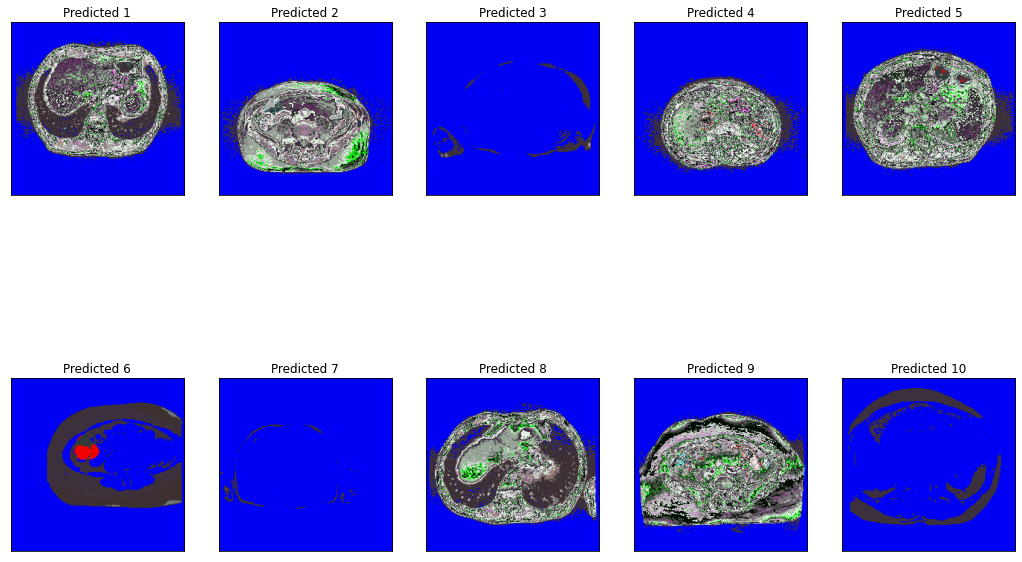

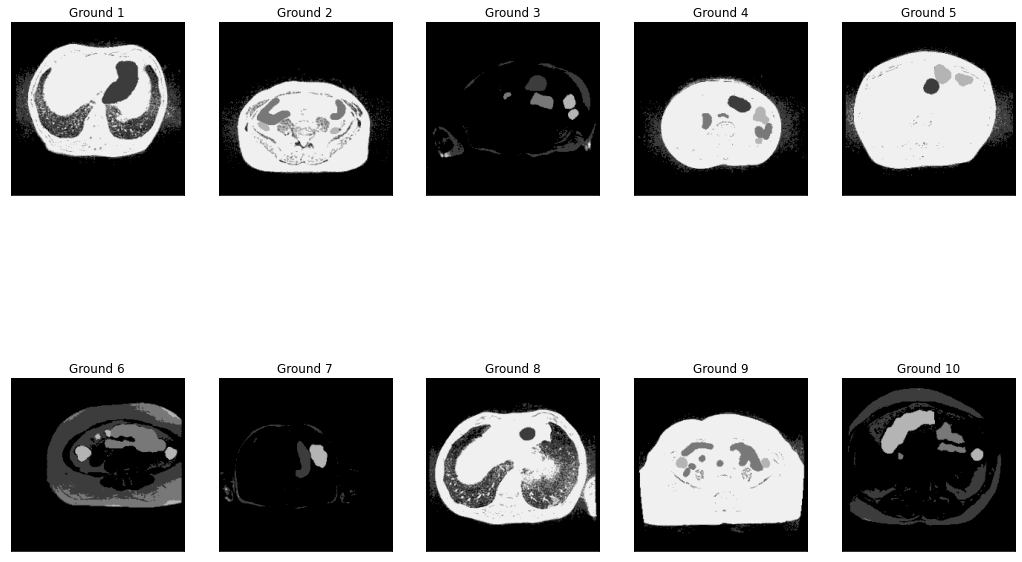

In [29]:
# show some samples (10) 
"""
plt.figure(figsize=(18,12))
for i in range(10):            
    plt.subplot(2,5,i+1)    
    plt.imshow(cv.imread(Results[indexs[i]])*60,cmap="gray")    
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted "+ str(i+1))


plt.figure(figsize=(18,12))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(cv.imread(GroundTruth[indexs[i]])*60,cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title("Ground "+ str(i+1))
"""